# Customer Segmentation

# Introduction

In this article I’ll explore a data set on mall customers to try to see if there are any discernible segments and patterns. Customer segmentation is useful in understanding what demographic and psychographic sub-populations there are within your customers in a business case.

By understanding this, you can better understand how to market and serve them. This is similar and related but slightly different from the UX methodology of creating user personas: creating your ideal customers, their pain points, a defining quote, and so on, to understand their perspective.

In [14]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [15]:
# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
# Check to see descriptive statistics
dataset.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Exploring the Data

It’s always informative to see how categorical variables are split up throughout the data set. This can be done with a simple count plot like so:

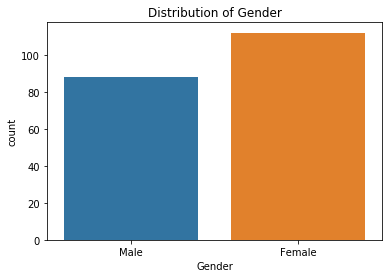

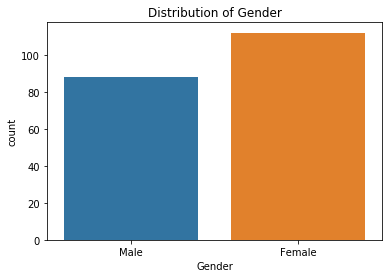

In [16]:
# See the distribution of gender to recognize different distributions
plt.figure()
fig = sns.countplot(x='Gender', data=dataset);
plt.title('Distribution of Gender');
fig.figure


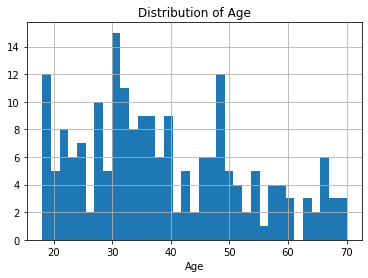

<Figure size 432x288 with 0 Axes>

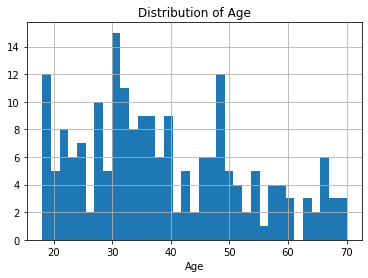

In [19]:
#Histogram of ages, Data distribution based on age, The ages are mostly between 30 and 40, by avarge ~ 38.
plt.figure();
dataset.hist('Age', bins=35);
plt.title('Distribution of Age');
plt.xlabel('Age');
plt.gcf()

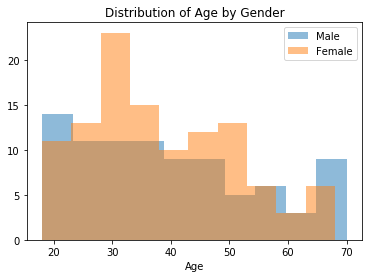

In [20]:
#Histogram of ages by gender
plt.figure();
plt.hist('Age', data=dataset[dataset['Gender'] == 'Male'], alpha=0.5, label='Male');
plt.hist('Age', data=dataset[dataset['Gender'] == 'Female'], alpha=0.5, label='Female');
plt.title('Distribution of Age by Gender');
plt.xlabel('Age');
plt.legend();
plt.gcf();

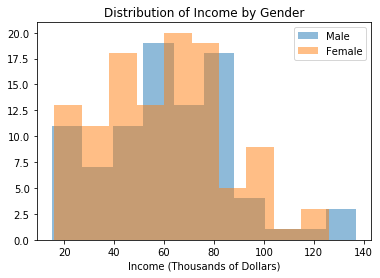

In [21]:
# Histogram of income by gender
plt.figure();
plt.hist('Annual Income (k$)', data=dataset[dataset['Gender'] == 'Male'], alpha=0.5, label='Male');
plt.hist('Annual Income (k$)', data=dataset[dataset['Gender'] == 'Female'], alpha=0.5, label='Female');
plt.title('Distribution of Income by Gender');
plt.xlabel('Income (Thousands of Dollars)');
plt.legend();
plt.gcf();

In [22]:
#the income is gender dependent or not?
# Create data sets by gender
male_dataset = dataset[dataset['Gender'] == 'Male']
female_dataset = dataset[dataset['Gender'] == 'Female']

# Print the average spending score for men and women
print(male_dataset['Spending Score (1-100)'].mean())
print(female_dataset['Spending Score (1-100)'].mean())

48.51136363636363
51.526785714285715


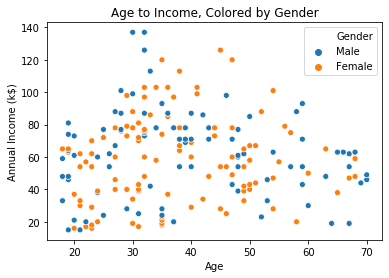

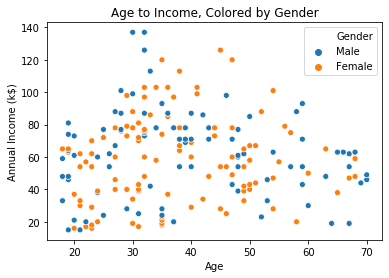

In [23]:
#scatter plots to investigate binary categorical variable 
plt.figure()
fig = sns.scatterplot('Age', 'Annual Income (k$)', hue='Gender', data=dataset);
plt.title('Age to Income, Colored by Gender');
fig.figure

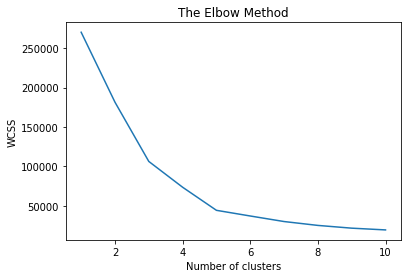

In [24]:
# Clustering by Kmeans, finding the optimal number of clusters by elbow method, 
from sklearn.cluster import KMeans
X = dataset.iloc[:, [3, 4]].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [25]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42
                ,max_iter=300,n_init=100)
y_kmeans = kmeans.fit_predict(X)

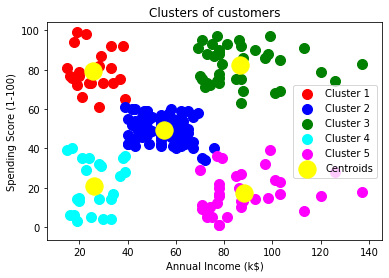

In [6]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show() 
